# CODECLAUSE

## Price Recomendation Prediction

AUTHOR : IRSHAD YASSEEN A

---

# Imports

In [1]:
import pandas as pd
import numpy as np

# Loading Dataset

In [2]:
df=pd.read_csv('amazon.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [3]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

# Filtering columns

In [4]:
df=df[['category', 'rating', 'rating_count','actual_price','discounted_price']]


# Preprocessing

## Observing Nulls 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category          1465 non-null   object
 1   rating            1465 non-null   object
 2   rating_count      1463 non-null   object
 3   actual_price      1465 non-null   object
 4   discounted_price  1465 non-null   object
dtypes: object(5)
memory usage: 57.4+ KB


In [6]:
df.isna().sum()

category            0
rating              0
rating_count        2
actual_price        0
discounted_price    0
dtype: int64

In [7]:
df[df.rating_count.isna()]

,category,rating,rating_count,actual_price,discounted_price
282,Computers&Accessories|Accessories&Peripherals|...,3.0,NaN,₹999,₹199
324,Computers&Accessories|Accessories&Peripherals|...,5.0,NaN,₹999,₹249


In [8]:
df.rating_count.dropna(inplace=True)

C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\101705396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rating_count.dropna(inplace=True)


## Changing column type

In [9]:
df.category=df.category.astype('category')

C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\4022820072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.category=df.category.astype('category')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   category          1465 non-null   category
 1   rating            1465 non-null   object  
 2   rating_count      1463 non-null   object  
 3   actual_price      1465 non-null   object  
 4   discounted_price  1465 non-null   object  
dtypes: category(1), object(4)
memory usage: 58.5+ KB


In [11]:
df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [12]:
df[df["rating"]=='|']

,category,rating,rating_count,actual_price,discounted_price
1279,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",|,992,"₹2,499","₹2,099"


In [13]:
df=df.drop(df[df["rating"]=='|'].index.to_list())

In [14]:
df.rating=df.rating.astype(float)

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1464, dtype: float64

In [16]:
df.rating_count=df.rating_count.apply(lambda x: str(x).replace(",",""))

In [23]:
df[df.rating_count=="nan"]

,category,rating,rating_count,actual_price,discounted_price
282,Computers&Accessories|Accessories&Peripherals|...,3.0,nan,₹999,₹199
324,Computers&Accessories|Accessories&Peripherals|...,5.0,nan,₹999,₹249


In [25]:
df=df.drop(df[df.rating_count=="nan"].index.tolist())

In [26]:
df.rating_count=df.rating_count.astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   category          1462 non-null   category
 1   rating            1462 non-null   float64 
 2   rating_count      1462 non-null   int32   
 3   actual_price      1462 non-null   object  
 4   discounted_price  1462 non-null   object  
dtypes: category(1), float64(1), int32(1), object(2)
memory usage: 64.0+ KB


In [32]:
df.actual_price=df.actual_price.apply(lambda x: str(x).replace(",",""))

In [36]:
df.actual_price=df.actual_price.apply(lambda x: str(x).replace("₹",""))

In [47]:
df.actual_price=df.actual_price.astype(float)

In [39]:
df.discounted_price=df.discounted_price.apply(lambda x: str(x).replace("₹",""))

In [41]:
df.discounted_price=df.discounted_price.apply(lambda x: str(x).replace(",",""))

In [46]:
df.discounted_price=df.discounted_price.astype(float)

# Analysisng columns

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   category          1462 non-null   category
 1   rating            1462 non-null   float64 
 2   rating_count      1462 non-null   int32   
 3   actual_price      1462 non-null   float64 
 4   discounted_price  1462 non-null   float64 
dtypes: category(1), float64(3), int32(1)
memory usage: 64.0 KB


## Visualizing data distributions

In [49]:
import seaborn as sns

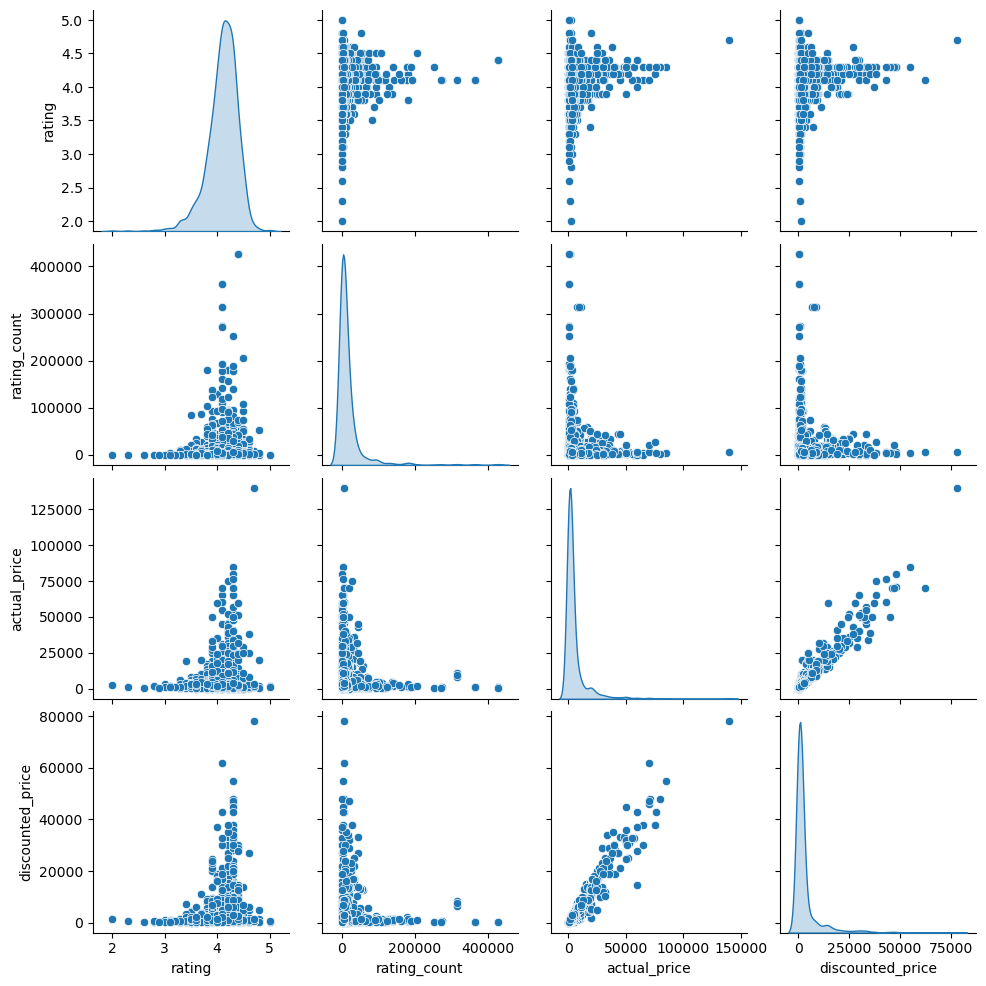

In [53]:
sns.pairplot(df,diag_kind="kde")

## Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.category=le.fit_transform(df.category)

In [59]:
df.category.value_counts()

10     231
119     76
117     68
97      63
76      52
      ... 
60       1
46       1
83       1
199      1
185      1
Name: category, Length: 211, dtype: int64

# Model


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import  SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [61]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Support Vector Regressor", SVR()),
    ("K-Nearest Neighbors Regressor", KNeighborsRegressor()),
    ("Gradient Boosting Regressor", GradientBoostingRegressor())
]

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, PowerTransformer, QuantileTransformer, Normalizer, Binarizer

In [63]:

scalers = [
    ("Standard Scaler", StandardScaler()),
    ("MinMax Scaler", MinMaxScaler()),
    ("MaxAbs Scaler", MaxAbsScaler()),
    ("Robust Scaler", RobustScaler()),
    ("Power Transformer", PowerTransformer(method='yeo-johnson')),
    ("Quantile Transformer", QuantileTransformer(output_distribution='normal')),
    ("Normalizer", Normalizer()),
    ("Binarizer", Binarizer(threshold=0.0))
]


In [69]:
X=df.drop('discounted_price',axis=1).values
y=df['discounted_price'].values

Comparing the scaling methods and models with respect to accuracy

Standard Scaler


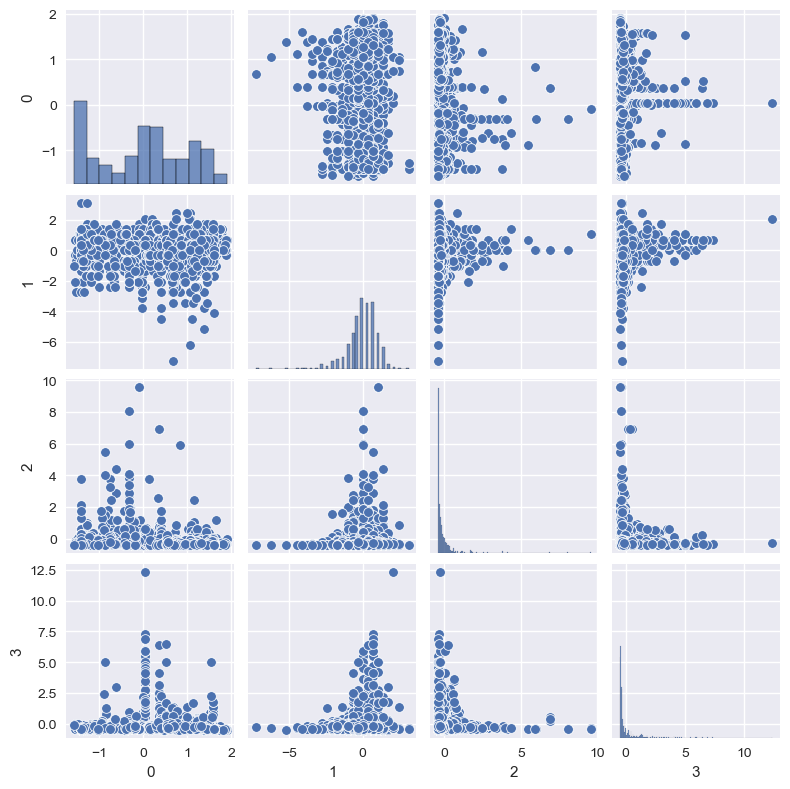

Scorer: Standard Scaler, Model: Linear Regression
Scorer: Standard Scaler, Model: Decision Tree Regressor
Scorer: Standard Scaler, Model: Random Forest Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Standard Scaler, Model: Support Vector Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Standard Scaler, Model: K-Nearest Neighbors Regressor
Scorer: Standard Scaler, Model: Gradient Boosting Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


MinMax Scaler


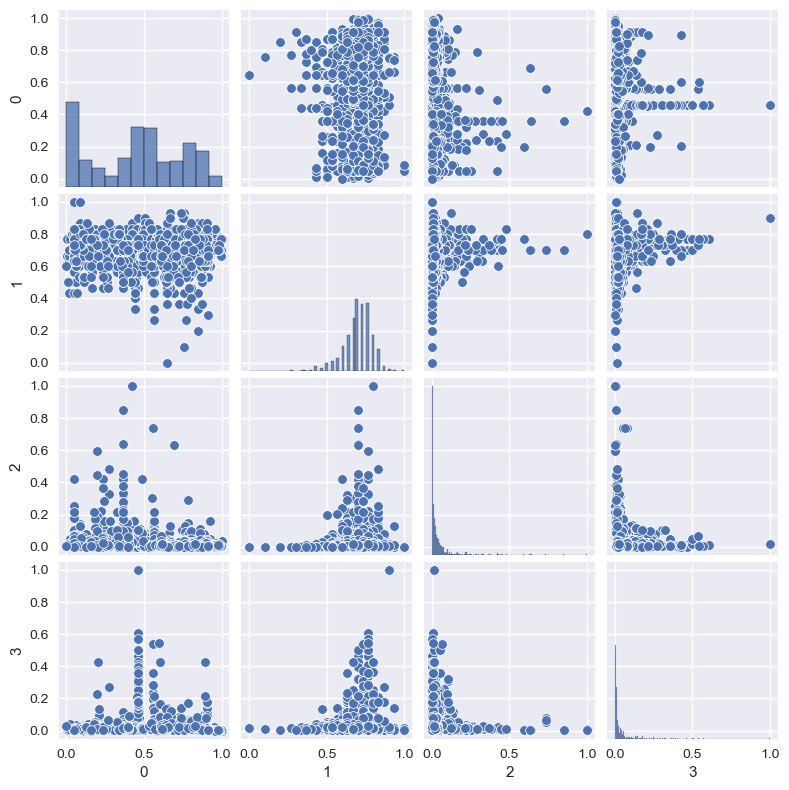

Scorer: MinMax Scaler, Model: Linear Regression
Scorer: MinMax Scaler, Model: Decision Tree Regressor
Scorer: MinMax Scaler, Model: Random Forest Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: MinMax Scaler, Model: Support Vector Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: MinMax Scaler, Model: K-Nearest Neighbors Regressor
Scorer: MinMax Scaler, Model: Gradient Boosting Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


MaxAbs Scaler


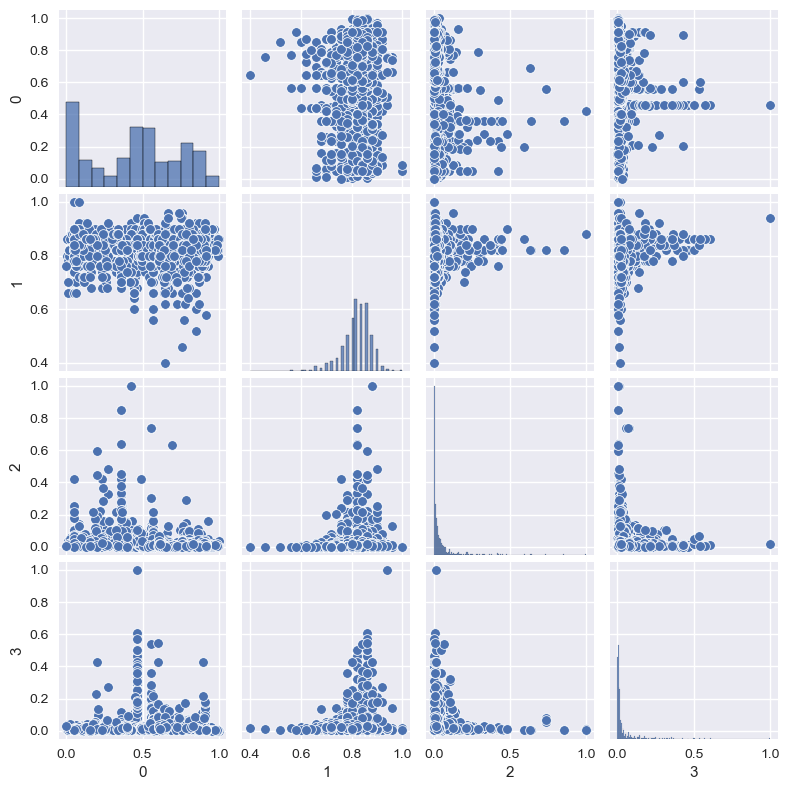

Scorer: MaxAbs Scaler, Model: Linear Regression
Scorer: MaxAbs Scaler, Model: Decision Tree Regressor
Scorer: MaxAbs Scaler, Model: Random Forest Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: MaxAbs Scaler, Model: Support Vector Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: MaxAbs Scaler, Model: K-Nearest Neighbors Regressor
Scorer: MaxAbs Scaler, Model: Gradient Boosting Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Robust Scaler


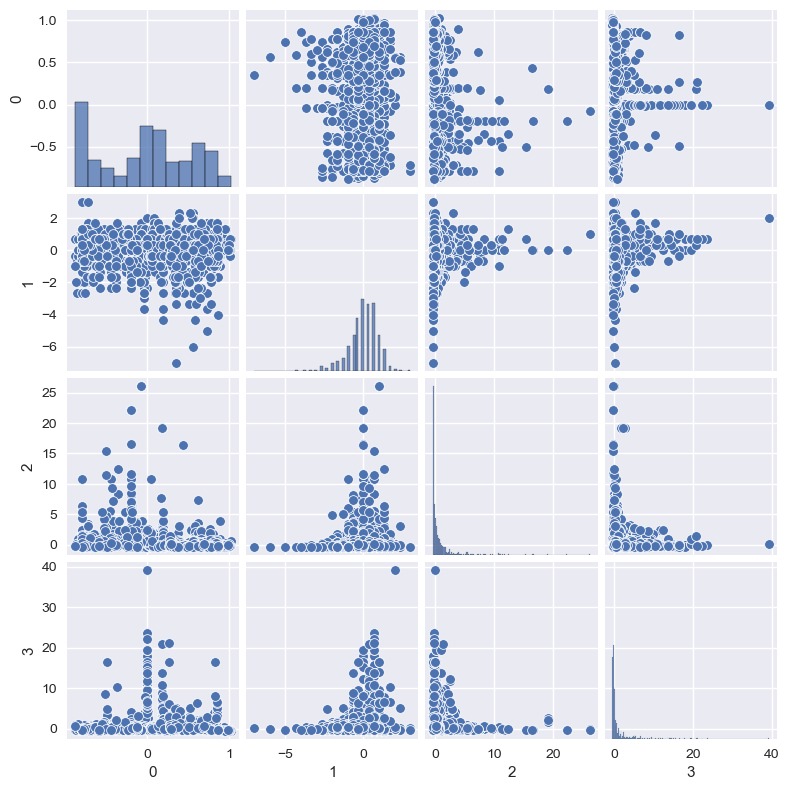

Scorer: Robust Scaler, Model: Linear Regression
Scorer: Robust Scaler, Model: Decision Tree Regressor
Scorer: Robust Scaler, Model: Random Forest Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Robust Scaler, Model: Support Vector Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Robust Scaler, Model: K-Nearest Neighbors Regressor
Scorer: Robust Scaler, Model: Gradient Boosting Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Power Transformer


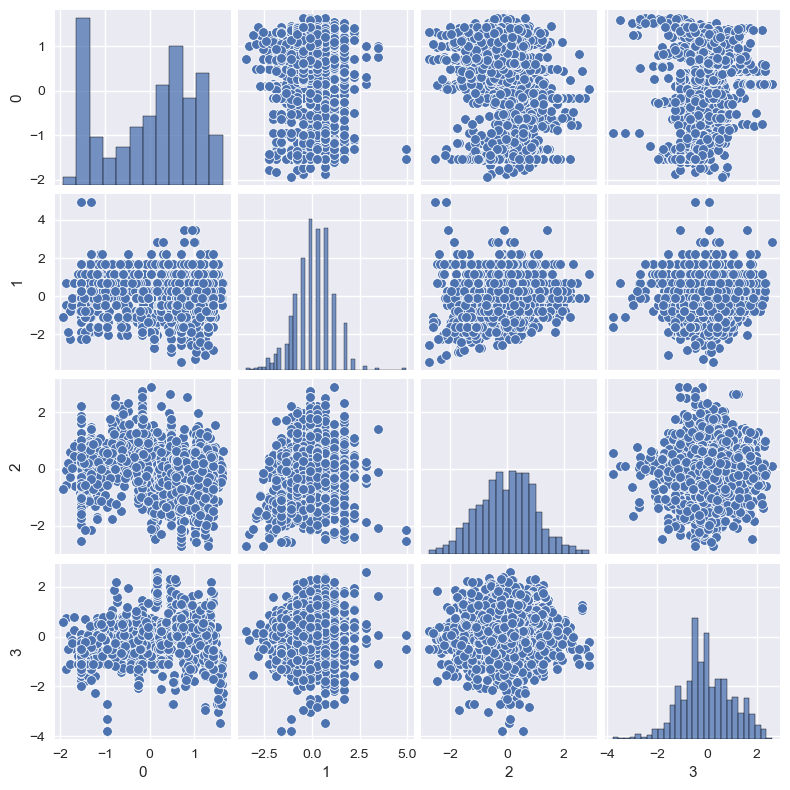

Scorer: Power Transformer, Model: Linear Regression
Scorer: Power Transformer, Model: Decision Tree Regressor
Scorer: Power Transformer, Model: Random Forest Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Power Transformer, Model: Support Vector Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Power Transformer, Model: K-Nearest Neighbors Regressor
Scorer: Power Transformer, Model: Gradient Boosting Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Quantile Transformer


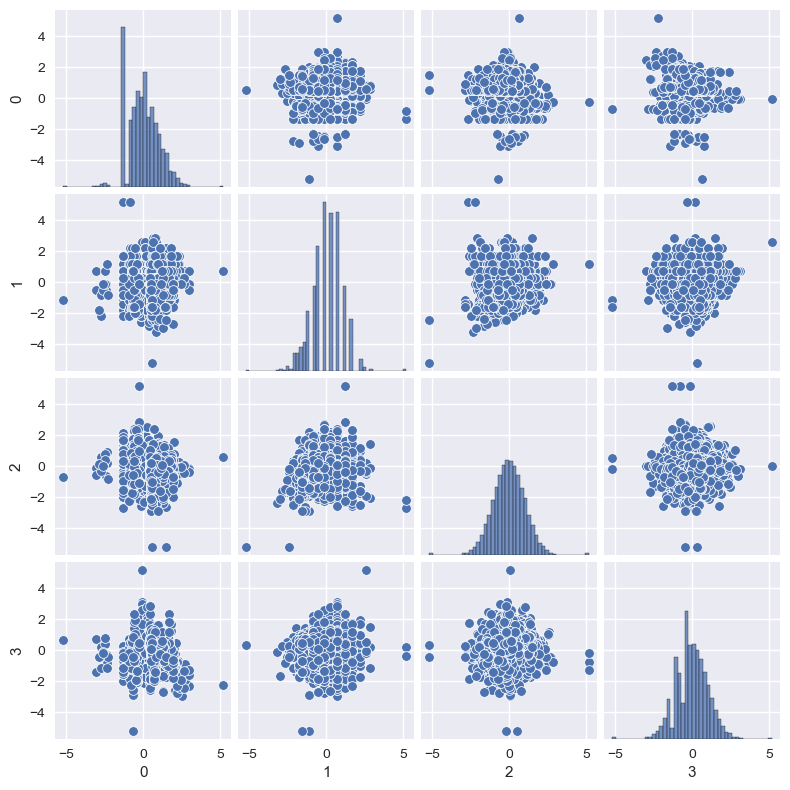

Scorer: Quantile Transformer, Model: Linear Regression
Scorer: Quantile Transformer, Model: Decision Tree Regressor
Scorer: Quantile Transformer, Model: Random Forest Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Quantile Transformer, Model: Support Vector Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Quantile Transformer, Model: K-Nearest Neighbors Regressor
Scorer: Quantile Transformer, Model: Gradient Boosting Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Normalizer


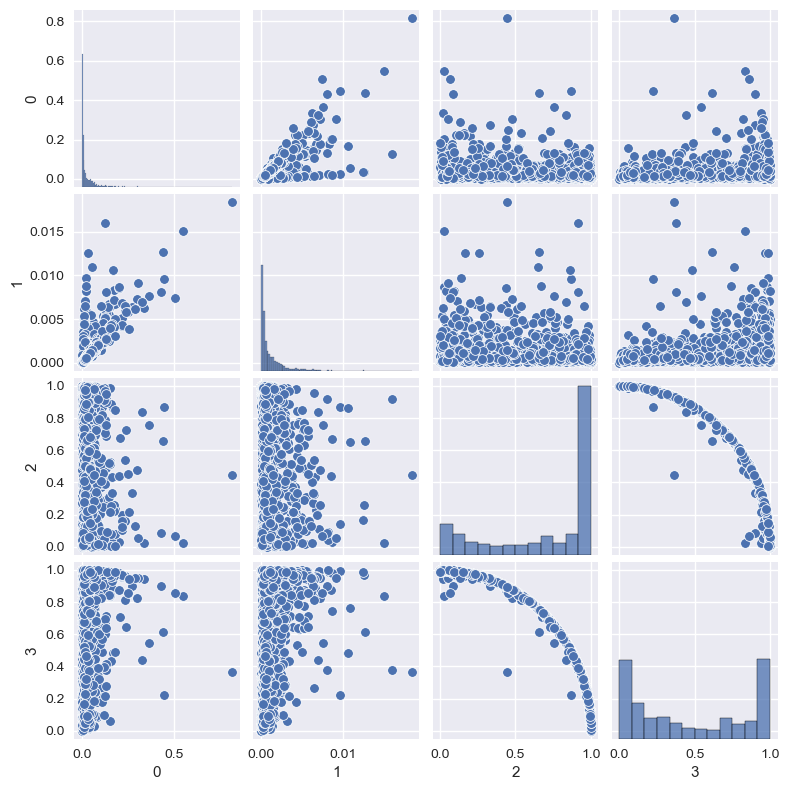

Scorer: Normalizer, Model: Linear Regression
Scorer: Normalizer, Model: Decision Tree Regressor
Scorer: Normalizer, Model: Random Forest Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Normalizer, Model: Support Vector Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Normalizer, Model: K-Nearest Neighbors Regressor
Scorer: Normalizer, Model: Gradient Boosting Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Binarizer


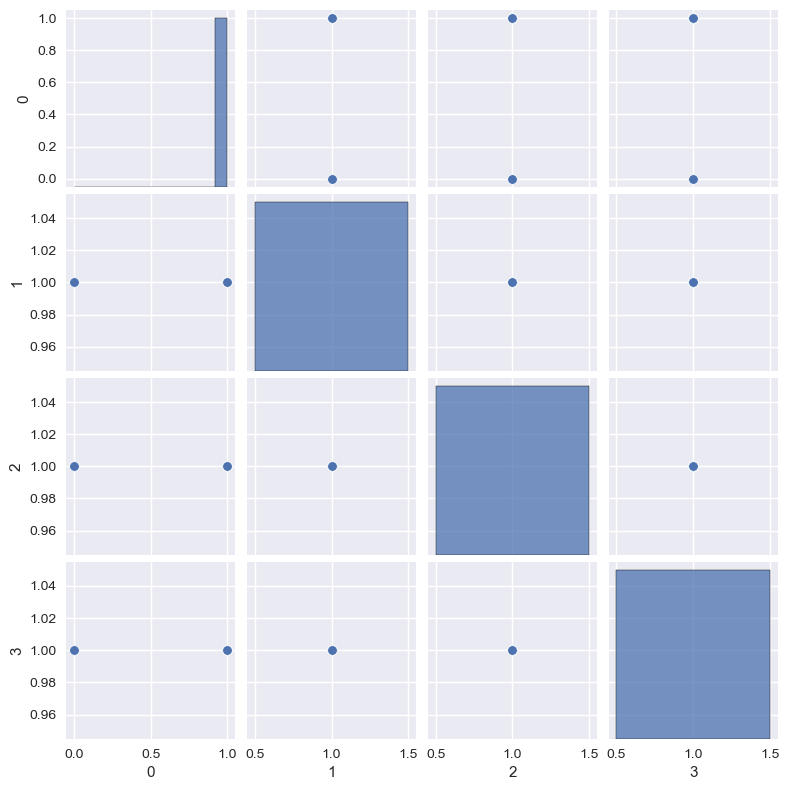

Scorer: Binarizer, Model: Linear Regression
Scorer: Binarizer, Model: Decision Tree Regressor
Scorer: Binarizer, Model: Random Forest Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Scorer: Binarizer, Model: Support Vector Regressor
Scorer: Binarizer, Model: K-Nearest Neighbors Regressor
Scorer: Binarizer, Model: Gradient Boosting Regressor


C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)
C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_67988\3597816612.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


In [112]:
import matplotlib.pyplot as plt
for scaler_name, scaler in scalers:
    X_scaled = scaler.fit_transform(X)  # Apply the scaler to your features
    d=pd.DataFrame(X_scaled,y)
    print(scaler_name)
    sns.pairplot(d,height=2)
    plt.show()
    for model_name, model in models:
        # Manual progress description using print
        print(f"Scorer: {scaler_name}, Model: {model_name}")
        
        scores = cross_val_score(model, X_scaled, y, cv=5, scoring="r2")
        mean_score = scores.mean()
        
        # Append results to the DataFrame with the desired column order
        results = results.append({"Scaler": scaler_name, "Model": model_name, "R2 Score": mean_score}, ignore_index=True)


Sorting in descending order

In [75]:
results.sort_values(by="R2 Score",ascending=False)

,Scaler,Model,R2 Score
18,Robust Scaler,Linear Regression,0.818216
12,MaxAbs Scaler,Linear Regression,0.818216
0,Standard Scaler,Linear Regression,0.818216
6,MinMax Scaler,Linear Regression,0.818216
17,MaxAbs Scaler,Gradient Boosting Regressor,0.816073
35,Quantile Transformer,Gradient Boosting Regressor,0.813393
29,Power Transformer,Gradient Boosting Regressor,0.812434
23,Robust Scaler,Gradient Boosting Regressor,0.812195
11,MinMax Scaler,Gradient Boosting Regressor,0.810926
14,MaxAbs Scaler,Random Forest Regressor,0.806340


<Axes: xlabel='Model', ylabel='R2 Score'>

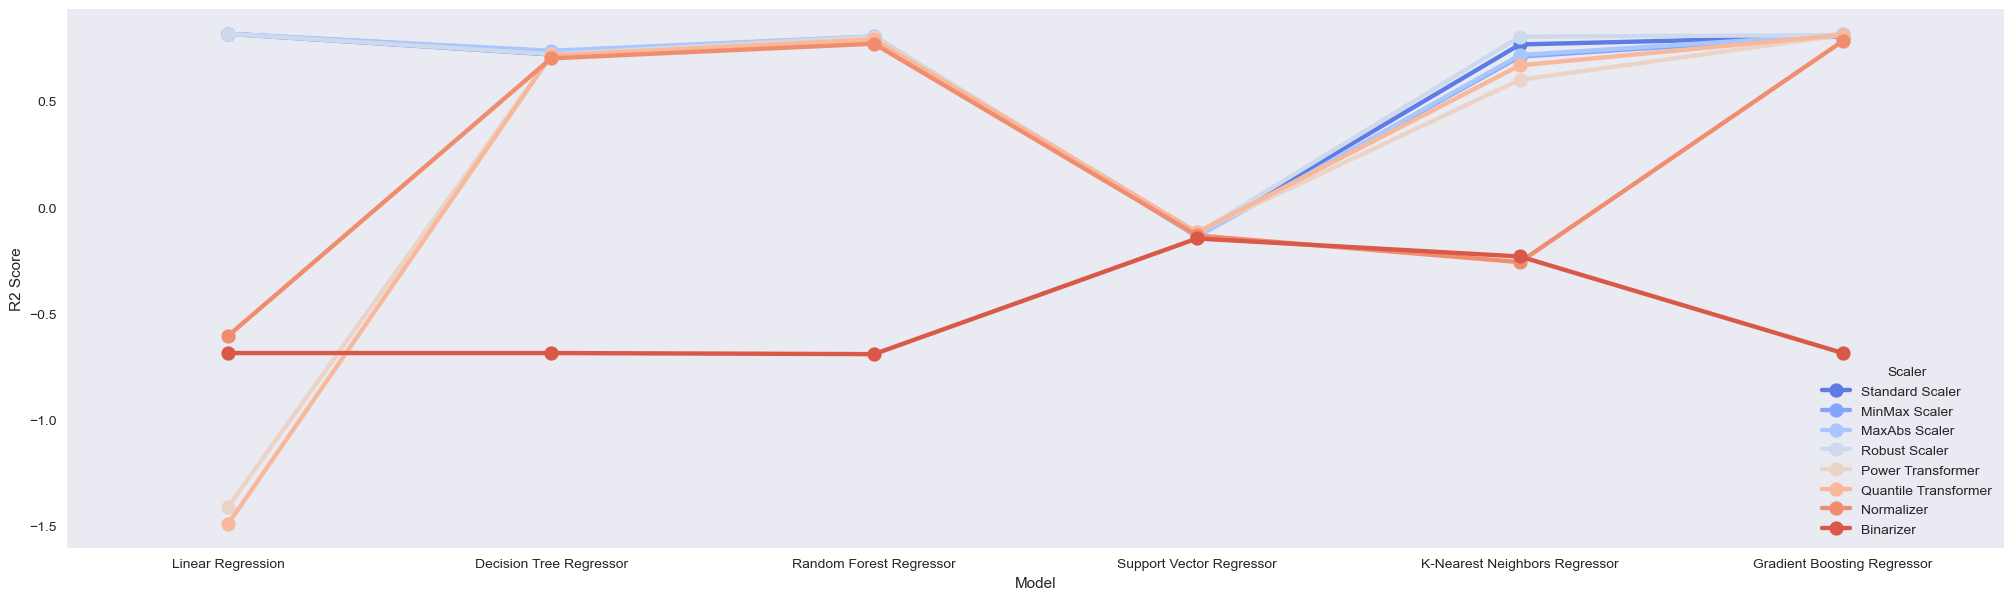

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,7))
plt.grid()
sns.pointplot(results,x="Model",y="R2 Score",hue='Scaler',palette="coolwarm")

Rhobust standard and minmax has always given better results
Rhobust scalar has always given the best accuracy in this case

Rhobust scalar and linear regression was the best combination and seems to be the best model to recomend price
